In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("anilist_anime_data_complete.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'idMal', 'title_romaji', 'title_english',
       'title_native', 'title_userPreferred', 'type', 'format', 'status',
       'description', 'startDate_year', 'startDate_month', 'startDate_day',
       'endDate_year', 'endDate_month', 'endDate_day', 'season', 'seasonYear',
       'seasonInt', 'episodes', 'duration', 'chapters', 'volumes',
       'countryOfOrigin', 'isLicensed', 'source', 'hashtag', 'trailer_id',
       'trailer_site', 'trailer_thumbnail', 'updatedAt',
       'coverImage_extraLarge', 'coverImage_large', 'coverImage_medium',
       'coverImage_color', 'bannerImage', 'genres', 'synonyms', 'tags',
       'averageScore', 'meanScore', 'popularity', 'favourites', 'trending',
       'rankings', 'isFavourite', 'isAdult', 'isLocked', 'siteUrl',
       'externalLinks', 'streamingEpisodes', 'relations', 'characters',
       'staff', 'studios', 'nextAiringEpisode', 'airingSchedule',
       'recommendations', 'reviews', 'stats_scoreDistribution',
       'stat

In [4]:
req_col = ['id', 'title_english', 'title_romaji', 'genres', 'averageScore', 'format', 'popularity']

In [5]:
df = df[req_col]

In [6]:
df

,id,title_english,title_romaji,genres,averageScore,format,popularity
0,1497,Tales of the Street Corner,Aru Machi Kado no Monogatari,"[""Drama"", ""Fantasy"", ""Music"", ""Romance""]",62.0,MOVIE,2068
1,1547,NaN,Obake no Q-tarou,"[""Comedy""]",57.0,TV,414
2,1572,Kimba the White Lion,Jungle Taitei,"[""Adventure""]",61.0,TV,2479
3,1982,Male,Osu,"[""Slice of Life""]",46.0,MOVIE,1325
4,1984,NaN,Memory,"[""Mystery""]",54.0,MOVIE,1163
...,...,...,...,...,...,...,...
20211,205842,NaN,I,[],NaN,MOVIE,0
20212,205843,NaN,Heya Nikki,[],NaN,MOVIE,0
20213,205844,NaN,Glass and Kumo,[],NaN,MOVIE,0
20214,205858,NaN,Tententengoku Jigokugoku,[],NaN,MUSIC,0


In [7]:
df.dropna(inplace=True)

In [8]:
df

,id,title_english,title_romaji,genres,averageScore,format,popularity
0,1497,Tales of the Street Corner,Aru Machi Kado no Monogatari,"[""Drama"", ""Fantasy"", ""Music"", ""Romance""]",62.0,MOVIE,2068
2,1572,Kimba the White Lion,Jungle Taitei,"[""Adventure""]",61.0,TV,2479
3,1982,Male,Osu,"[""Slice of Life""]",46.0,MOVIE,1325
5,1989,The Drop,Shizuku,"[""Comedy""]",50.0,MOVIE,1009
6,2047,Mermaid,Ningyo,"[""Fantasy""]",57.0,MOVIE,1495
...,...,...,...,...,...,...,...
20161,201262,POKÉTOON (2025),POKÉTOON (2025),"[""Comedy"", ""Fantasy"", ""Slice of Life""]",59.0,ONA,502
20163,201961,Quiet Please!,Jebal Joyonghi Jom Hae!,"[""Comedy"", ""Romance""]",71.0,ONA,907
20172,204066,JUJUTSU KAISEN: Execution -Shibuya Incident x ...,Jujutsu Kaisen: Shibuya Jihen Tokubetsu Henshu...,"[""Action"", ""Drama"", ""Supernatural""]",75.0,MOVIE,6629
20193,204654,"August, A Certain, Moonlight","Hachigatsu, Bou, Tsukiakari","[""Psychological""]",57.0,MUSIC,255


In [9]:
df = df.drop_duplicates(subset=['id'])

In [10]:
df['genres'] = df['genres'].astype(str)

In [11]:
from collections import Counter
all_genres = Counter(",".join(df['genres']).split(','))
print(all_genres.most_common(10))

[('["Action"', 2900), ('["Comedy"', 1757), (' "Sci-Fi"]', 1480), (' "Drama"', 1180), (' "Comedy"', 1114), (' "Supernatural"]', 1102), (' "Slice of Life"]', 1093), (' "Fantasy"', 1073), (' "Adventure"', 1056), (' "Fantasy"]', 939)]


<Axes: >

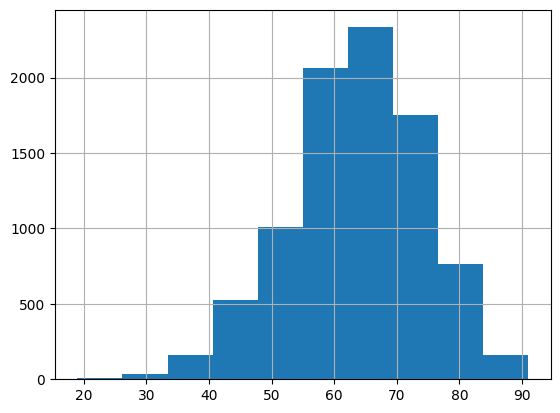

In [12]:
df['averageScore'].hist()

In [13]:
df.sort_values('popularity', ascending=False)[['title_english','popularity']].head()

,title_english,popularity
9801,Attack on Titan,938026
14553,Demon Slayer: Kimetsu no Yaiba,890351
6384,Death Note,854079
15400,JUJUTSU KAISEN,847691
12236,My Hero Academia,789122


In [15]:
import matplotlib.pyplot as plt

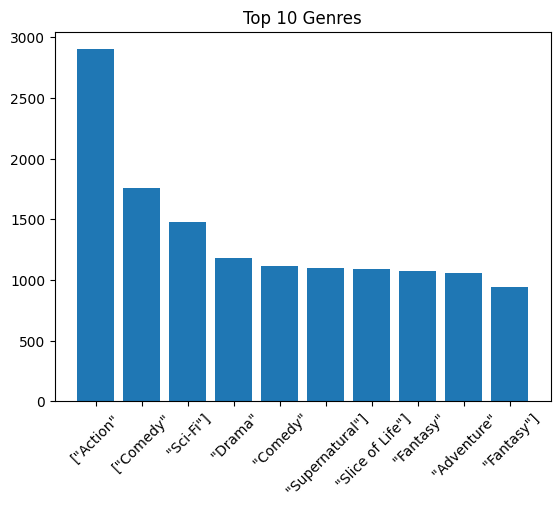

In [16]:

top_genres = dict(all_genres.most_common(10))
plt.bar(top_genres.keys(), top_genres.values())
plt.xticks(rotation=45)
plt.title("Top 10 Genres")
plt.show()

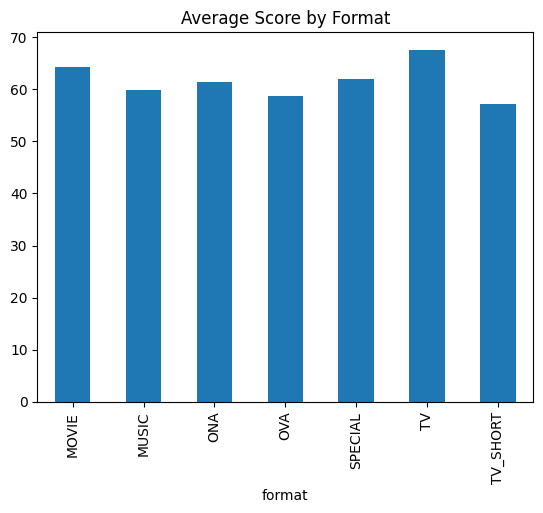

In [17]:
df.groupby('format')['averageScore'].mean().plot(kind='bar')
plt.title("Average Score by Format")
plt.show()

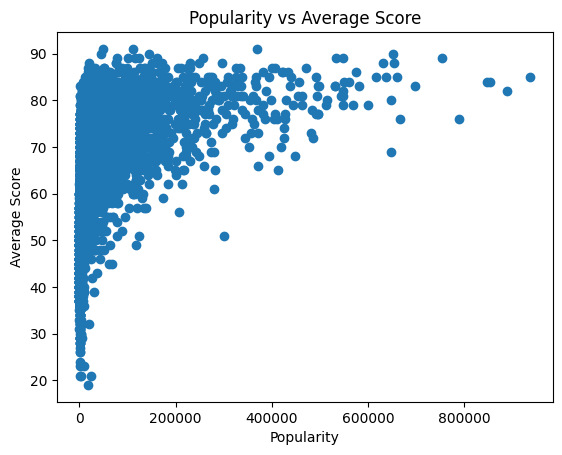

In [18]:
plt.scatter(df['popularity'], df['averageScore'])
plt.title("Popularity vs Average Score")
plt.xlabel("Popularity")
plt.ylabel("Average Score")
plt.show()

Modeling

In [19]:
df['genres'] = df['genres'].apply(lambda x: " ".join(eval(x)))

In [29]:
df = df.reset_index(drop=True)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer()
genre_matrix = tfidf.fit_transform(df['genres'])

cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

In [31]:
genre_matrix.shape

(8816, 23)

In [32]:
print(genre_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 28383 stored elements and shape (8816, 23)>
  Coords	Values
  (0, 3)	0.4080824952758784
  (0, 5)	0.3916006169840829
  (0, 12)	0.6928567870517804
  (0, 16)	0.4472886165144182
  (1, 1)	1.0
  (2, 19)	0.5773502691896257
  (2, 14)	0.5773502691896257
  (2, 9)	0.5773502691896257
  (3, 2)	1.0
  (4, 5)	1.0
  (5, 1)	0.4363597912084494
  (5, 11)	0.6250504436417497
  (5, 17)	0.4576582106330937
  (5, 6)	0.4576582106330937
  (6, 3)	0.37496980819045345
  (6, 1)	0.37958517941361725
  (6, 11)	0.5437253605224487
  (6, 17)	0.398112469327614
  (6, 6)	0.398112469327614
  (6, 0)	0.3204502931370464
  (7, 0)	1.0
  (8, 5)	0.46823594434990123
  (8, 1)	0.4939492097503325
  (8, 17)	0.518058528839058
  (8, 6)	0.518058528839058
  :	:
  (8807, 19)	0.5351432495961498
  (8807, 14)	0.5351432495961498
  (8807, 9)	0.5351432495961498
  (8807, 2)	0.37532000644119523
  (8808, 5)	0.7641521277566278
  (8808, 2)	0.6450360653831833
  (8809, 2)	0.6879251414743025
  (8

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

In [34]:
df['title'] = df['title_english'].fillna(df['title_romaji'])

indices = pd.Series(df.index, index=df['title'].str.lower()).drop_duplicates()

In [35]:
def recommend(title, top_n=5):
    title = title.lower()
    
    matches = df[df['title'].str.lower().str.contains(title)]
    if matches.empty:
        return "Anime not found in dataset"
    
    idx = matches.index[0]   # now perfectly aligned
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    anime_indices = [i[0] for i in sim_scores]
    
    result = df[['title','genres','averageScore','format']].iloc[anime_indices]
    result = result.sort_values(by='averageScore', ascending=False)
    
    return result

In [36]:
recommend("jujutsu kaisen")

,title,genres,averageScore,format
3897,HAKUOKI: WILD DANCE OF TOKYO,Action Drama Supernatural,72.0,MOVIE
3503,Hakuoki ~Demon of the Fleeting Blossom~ Record...,Action Drama Supernatural,71.0,TV
3896,Hakuoki ~Demon of the Fleeting Blossom~ Dawn o...,Action Drama Supernatural,69.0,TV
3377,Hakuoki ~Demon of the Fleeting Blossom~,Action Drama Supernatural,68.0,TV
2847,Ghost Slayers Ayashi: Inferno OVA,Action Drama Supernatural,58.0,OVA


In [37]:
import pickle

# Save cosine similarity matrix
pickle.dump(cosine_sim, open("cosine_sim.pkl", "wb"))

# Save cleaned dataframe
df.to_csv("cleaned_anime.csv", index=False)

print("Files saved successfully!")

Files saved successfully!
